# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | quellon
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | la paz
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | lae
Processing Record 14 of Set 1 | inyonga
Processing Record 15 of Set 1 | isla del bosque
Processing Record 16 of Set 1 | olinda
Processing Record 17 of Set 1 | fuli
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | chipata
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | okhotsk
Processing Record 22 of Set 1 | hasaki
Processing Record 23 of Set 1 | bl

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coquimbo,-29.9533,-71.3436,288.00,82,75,5.14,CL,1696876875
1,quellon,-43.1167,-73.6167,282.22,90,100,4.51,CL,1696876971
2,port-aux-francais,-49.3500,70.2167,275.84,79,70,16.54,TF,1696876972
3,port mathurin,-19.6833,63.4167,296.69,74,5,6.48,MU,1696876974
4,lebu,-37.6167,-73.6500,285.85,71,100,6.57,CL,1696876856


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coquimbo,-29.9533,-71.3436,288.00,82,75,5.14,CL,1696876875
1,quellon,-43.1167,-73.6167,282.22,90,100,4.51,CL,1696876971
2,port-aux-francais,-49.3500,70.2167,275.84,79,70,16.54,TF,1696876972
3,port mathurin,-19.6833,63.4167,296.69,74,5,6.48,MU,1696876974
4,lebu,-37.6167,-73.6500,285.85,71,100,6.57,CL,1696876856


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

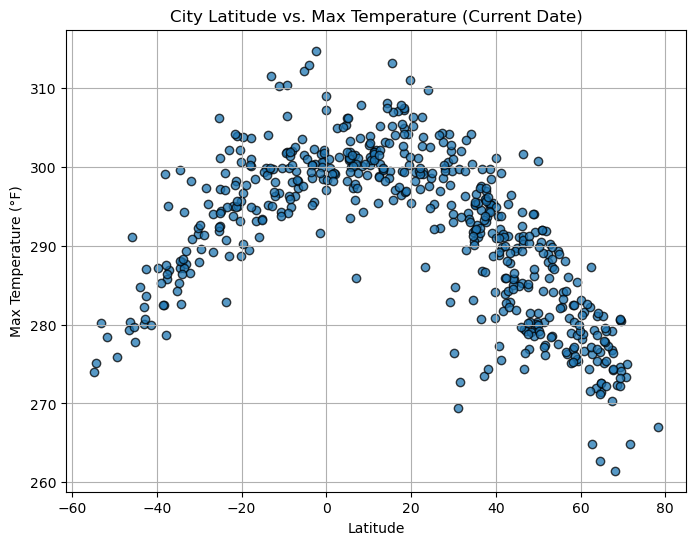

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

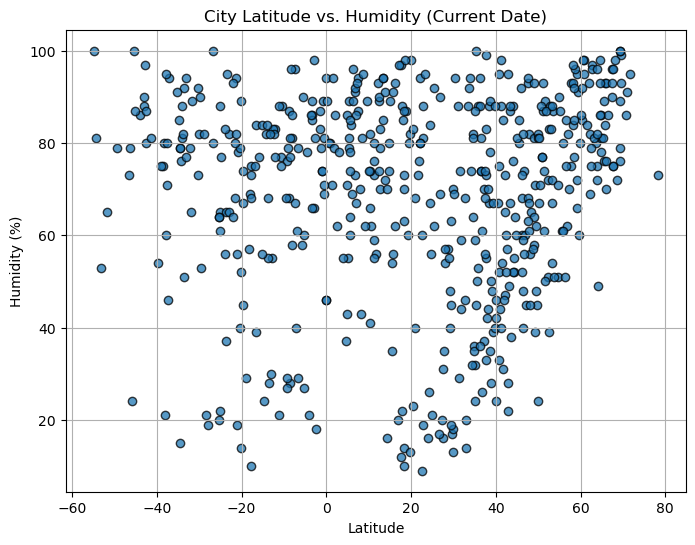

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

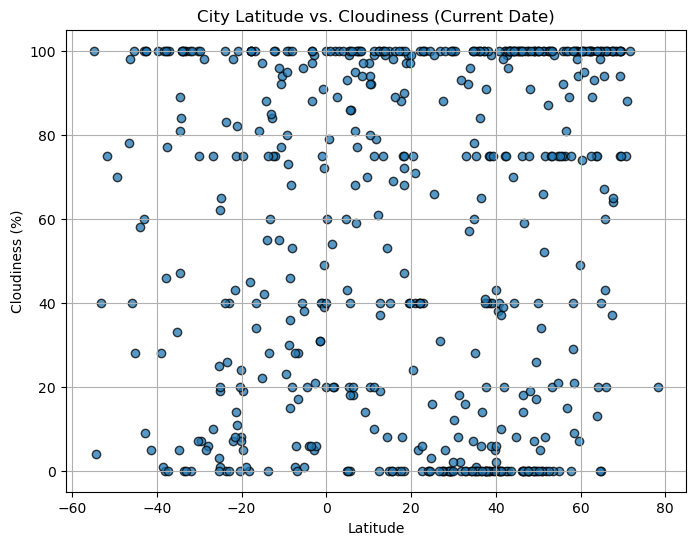

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

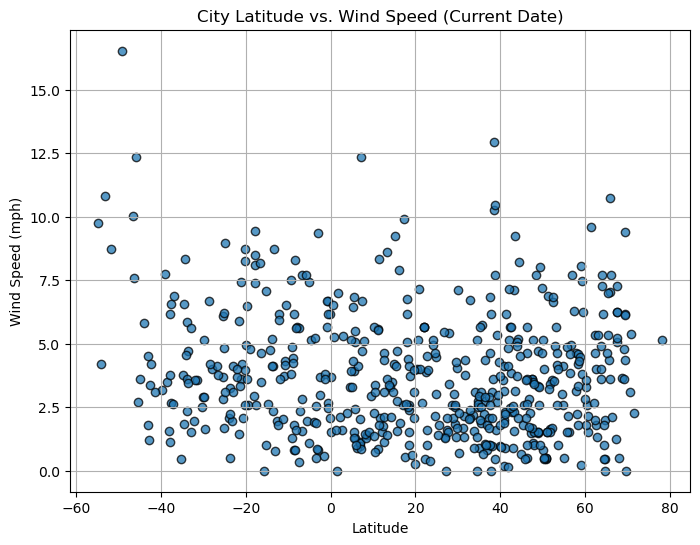

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, hemisphere, save_filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,anadyr,64.7500,177.4833,271.43,86,100,2.00,RU,1696876892
10,ribeira grande,38.5167,-28.7000,295.25,88,75,10.28,PT,1696876984
14,isla del bosque,22.7333,-105.8500,299.44,81,100,1.59,MX,1696876996
16,fuli,46.7217,131.1394,279.48,74,0,2.83,CN,1696877000
20,okhotsk,59.3833,143.3000,275.44,91,94,7.49,RU,1696877006


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coquimbo,-29.9533,-71.3436,288.00,82,75,5.14,CL,1696876875
1,quellon,-43.1167,-73.6167,282.22,90,100,4.51,CL,1696876971
2,port-aux-francais,-49.3500,70.2167,275.84,79,70,16.54,TF,1696876972
3,port mathurin,-19.6833,63.4167,296.69,74,5,6.48,MU,1696876974
4,lebu,-37.6167,-73.6500,285.85,71,100,6.57,CL,1696876856


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.83


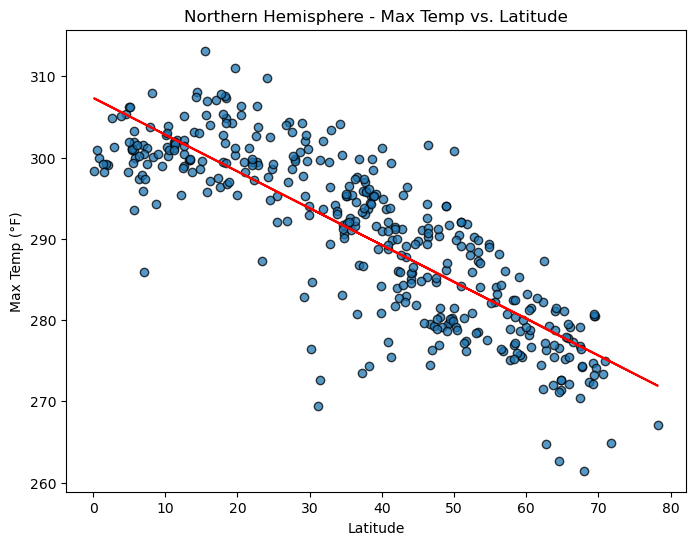

In [28]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation and r-value on the plot
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")
plt.annotate(f"The r-value is: {round(rvalue, 2)}", (0, -10), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig5.png")

print(f"The r-value is: {round(rvalue, 2)}")

# Show the plot
plt.show()

The r-value is: 0.8


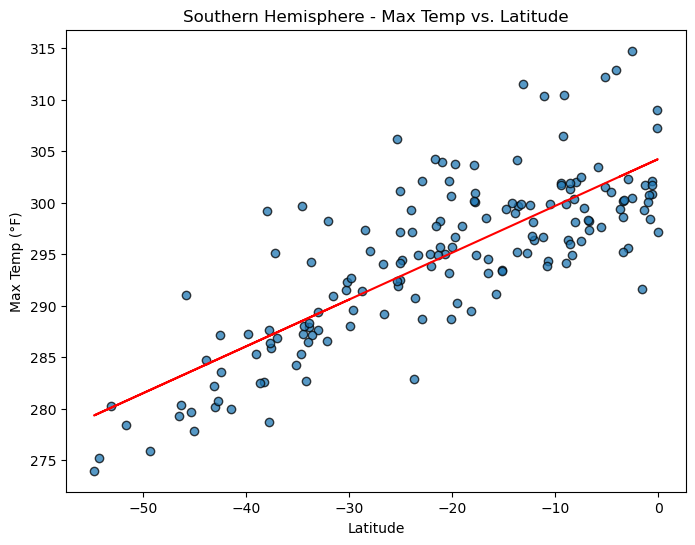

In [29]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation and r-value on the plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
plt.annotate(f"The r-value is: {round(rvalue, 2)}", (-50, 75), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig6.png")

print(f"The r-value is: {round(rvalue, 2)}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

## Northern Hemisphere - Temperature vs. Latitude:

* In the Northern Hemisphere, there is a strong negative correlation between temperature and latitude. As you move away from the equator (higher latitudes), temperatures tend to decrease significantly.
* The negative r-value of approximately -0.83 indicates a robust and strong negative linear relationship between latitude and temperature in the   Northern Hemisphere. This means that latitude can explain about 83% of the variation in maximum temperatures in the Northern Hemisphere.
* The steep slope of the regression line further emphasizes the magnitude of this relationship. For every degree of latitude increase, the maximum temperature decreases by approximately 0.83°F.
* Overall, the data and regression analysis strongly support the concept that as you move northward from the equator in the Northern Hemisphere, temperatures tend to decrease significantly.

## Southern Hemisphere - Temperature vs. Latitude:

* In the Southern Hemisphere, there is a strong positive correlation between temperature and latitude. As you move closer to the equator (lower latitudes), temperatures tend to increase significantly.
* The positive r-value of approximately 0.80 indicates a robust and strong positive linear relationship between latitude and temperature in the Southern Hemisphere. This means that latitude can explain about 80% of the variation in maximum temperatures in the Southern Hemisphere.
* Similar to the Northern Hemisphere, the steep slope of the regression line highlights the magnitude of this relationship. For every degree of latitude decrease (moving closer to the equator), the maximum temperature increases by approximately 0.80°F.
* The data and regression analysis strongly support as you move closer to the equator from higher latitudes in the Southern Hemisphere, temperatures tend to increase significantly.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16


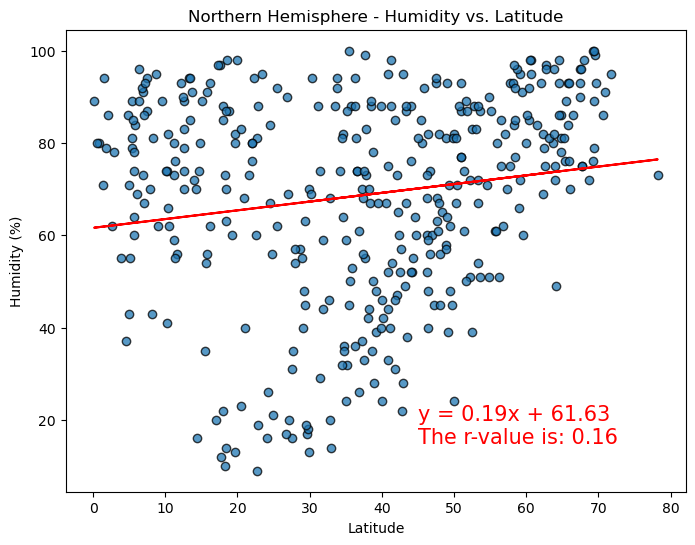

In [31]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation and r-value on the plot
plt.annotate(line_eq, (45, 20), fontsize=15, color="red")
plt.annotate(f"The r-value is: {round(rvalue, 2)}", (45, 15), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig7.png")

print(f"The r-value is: {round(rvalue, 2)}")

# Show the plot
plt.show()


The r-value is: -0.11


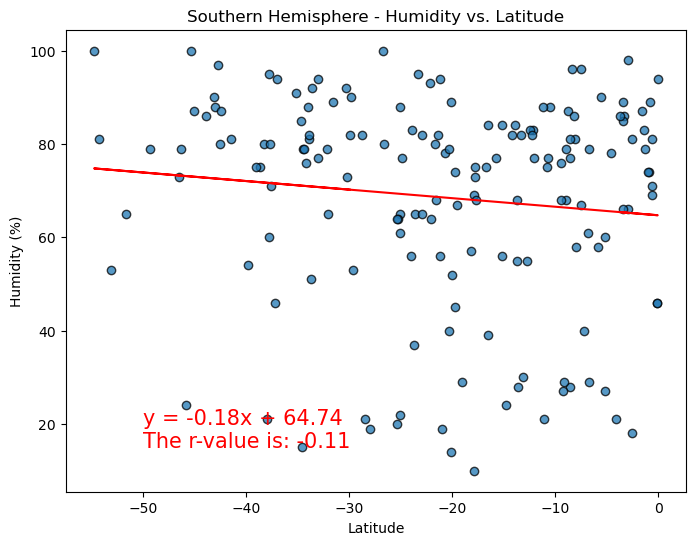

In [32]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation and r-value on the plot
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.annotate(f"The r-value is: {round(rvalue, 2)}", (-50, 15), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig8.png")

print(f"The r-value is: {round(rvalue, 2)}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

## Northern Hemisphere - Humidity vs. Latitude:

* In the Northern Hemisphere, there is a very weak positive correlation between humidity and latitude. As you move away from the equator (higher latitudes), humidity tends to increase slightly, but the relationship is not very pronounced.
* The low positive r-value of approximately 0.16 indicates a very weak and almost negligible positive linear relationship between latitude and humidity in the Northern Hemisphere. This suggests that latitude has only a minimal impact on humidity levels in this hemisphere.
* The shallow slope of the regression line further emphasizes the weak nature of this relationship. For every degree of latitude increase, humidity increases by a very small amount.
* Overall, the data and regression analysis suggest that while there might be a slight increase in humidity as you move away from the equator in the Northern Hemisphere, latitude alone does not strongly determine humidity levels in this region.

## Southern Hemisphere - Humidity vs. Latitude:

* In the Southern Hemisphere, there is a very weak negative correlation between humidity and latitude. As you move closer to the equator (lower latitudes), humidity tends to decrease slightly, but like the Northern Hemisphere, the relationship is not highly pronounced.
* The low negative r-value of approximately -0.11 indicates a very weak and almost negligible negative linear relationship between latitude and humidity in the Southern Hemisphere. This suggests that latitude has only a minimal impact on humidity levels in this hemisphere as well.
* Similar to the Northern Hemisphere, the shallow slope of the regression line highlights the weak nature of this relationship. For every degree of latitude decrease (moving closer to the equator), humidity decreases by a very small amount.
* In summary, the data and regression analysis for the Southern Hemisphere also indicate that while there might be a slight decrease in humidity as you move closer to the equator, latitude alone does not strongly determine humidity levels in this region.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08


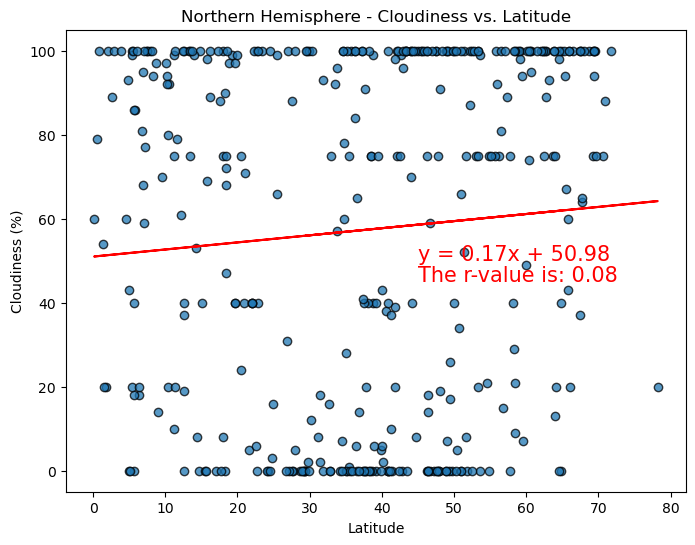

In [33]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation and r-value on the plot
plt.annotate(line_eq, (45, 50), fontsize=15, color="red")
plt.annotate(f"The r-value is: {round(rvalue, 2)}", (45, 45), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig9.png")

print(f"The r-value is: {round(rvalue, 2)}")

# Show the plot
plt.show()

The r-value is: -0.07


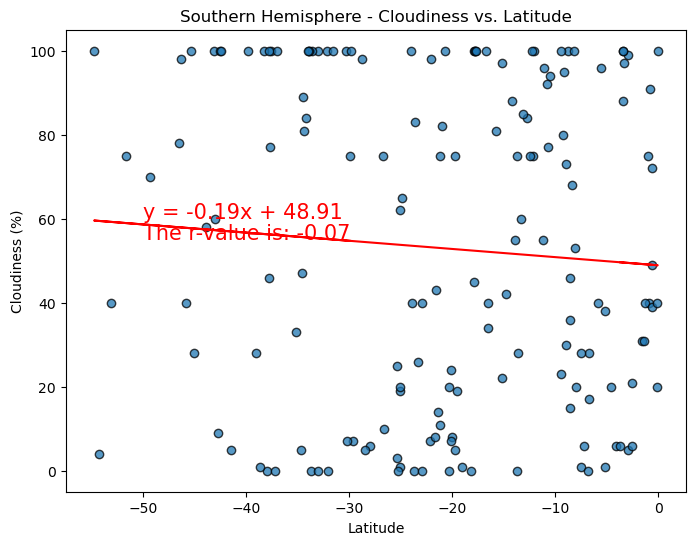

In [34]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation and r-value on the plot
plt.annotate(line_eq, (-50, 60), fontsize=15, color="red")
plt.annotate(f"The r-value is: {round(rvalue, 2)}", (-50, 55), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig10.png")

print(f"The r-value is: {round(rvalue, 2)}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

## Northern Hemisphere - Cloudiness vs. Latitude:

* In the Northern Hemisphere, there is an almost non-existent positive correlation between cloudiness and latitude. The relationship is exceptionally weak, and it's challenging to discern any meaningful pattern.
* The very low positive r-value of approximately 0.08 suggests that there is almost no linear relationship between latitude and cloudiness in the Northern Hemisphere. This means that latitude has virtually no predictive power in determining cloudiness levels in this hemisphere.
* The nearly flat slope of the regression line further emphasizes the lack of a meaningful relationship. For every degree of latitude increase, cloudiness levels change by a minuscule amount.
* The data and regression analysis for the Northern Hemisphere suggest that latitude is not a significant factor in determining cloudiness levels in this region.

## Southern Hemisphere - Cloudiness vs. Latitude:

* In the Southern Hemisphere, there is an almost non-existent negative correlation between cloudiness and latitude. Similar to the Northern Hemisphere, the relationship is extremely weak, and no meaningful pattern can be discerned.
* The very low negative r-value of approximately -0.07 indicates that there is almost no linear relationship between latitude and cloudiness in the Southern Hemisphere. Latitude has virtually no predictive power in determining cloudiness levels in this hemisphere as well.
* The nearly flat slope of the regression line further highlights the lack of a meaningful relationship. For every degree of latitude decrease (moving closer to the equator), cloudiness levels change by a minuscule amount.
* In summary, the data and regression analysis for the Southern Hemisphere also suggest that latitude is not a significant factor in determining cloudiness levels in this region.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09


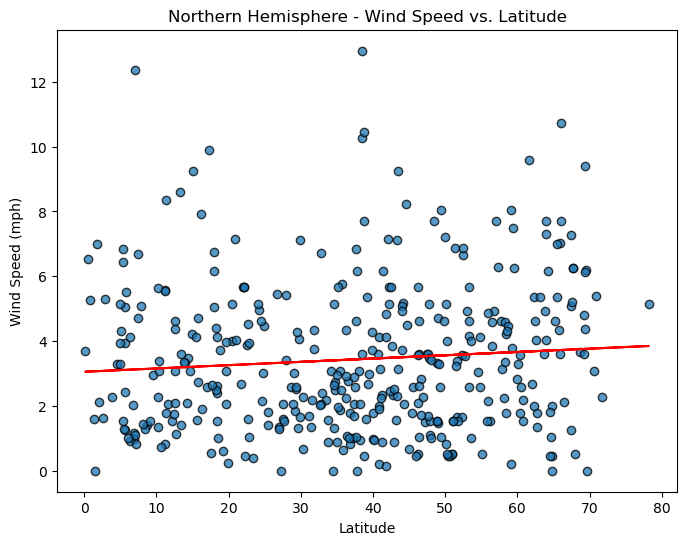

In [37]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation and r-value on the plot
plt.annotate(line_eq, (0, 25), fontsize=15, color="red")
plt.annotate(f"The r-value is: {round(rvalue, 2)}", (0, 20), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig11.png")

print(f"The r-value is: {round(rvalue, 2)}")

# Show the plot
plt.show()

The r-value is: -0.22


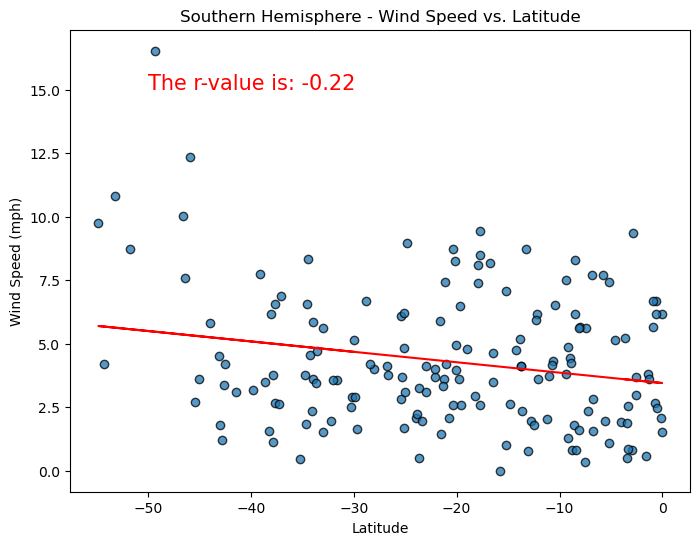

In [40]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the linear regression equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate the linear regression equation and r-value on the plot
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.annotate(f"The r-value is: {round(rvalue, 2)}", (-50, 15), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig12.png")

print(f"The r-value is: {round(rvalue, 2)}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** 

## Northern Hemisphere - Wind Speed vs. Latitude:

* In the Northern Hemisphere, there is an extremely weak positive correlation between wind speed and latitude. The relationship is exceptionally weak, and it's challenging to discern any meaningful pattern.
* The very low positive r-value of approximately 0.09 suggests that there is almost no linear relationship between latitude and wind speed in the Northern Hemisphere. This means that latitude has virtually no predictive power in determining wind speed levels in this hemisphere.
* The nearly flat slope of the regression line further emphasizes the lack of a meaningful relationship. For every degree of latitude increase, wind speed levels change by a minuscule amount.
* The data and regression analysis for the Northern Hemisphere suggest that latitude is not a significant factor in determining wind speed levels in this region.

## Southern Hemisphere - Wind Speed vs. Latitude:

* In the Southern Hemisphere, there is an extremely weak negative correlation between wind speed and latitude. Similar to the Northern Hemisphere, the relationship is exceptionally weak, and no meaningful pattern can be discerned.
* The very low negative r-value of approximately -0.22 indicates that there is almost no linear relationship between latitude and wind speed in the Southern Hemisphere. Latitude has virtually no predictive power in determining wind speed levels in this hemisphere as well.
* The nearly flat slope of the regression line further highlights the lack of a meaningful relationship. For every degree of latitude decrease (moving closer to the equator), wind speed levels change by a minuscule amount.
* In summary, the data and regression analysis for the Southern Hemisphere also suggest that latitude is not a significant factor in determining wind speed levels in this region.